<a href="https://colab.research.google.com/github/Satyendra0207/projects_/blob/main/K_means_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this  I implement K-Means clustering to find intrinsic **groups within the dataset that display the same status_type behaviour**. The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

mounting the drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/collab_data/text and image /Live.csv') #reading the csv

In [6]:
df.shape

(7050, 16)

In [7]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Checking for Null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [9]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [10]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

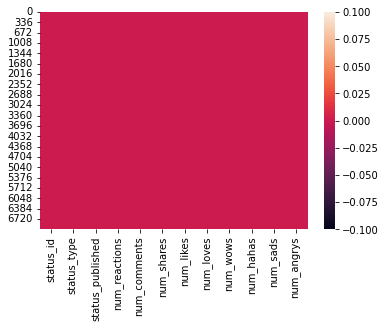

In [11]:
sns.heatmap(df.isnull()) #

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [13]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


###Droping the columns that are not required

In [14]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


###Categorising dataset on the basis of status_type

In [16]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [17]:
cal=df.groupby('status_type',as_index=False).sum()
cal

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,link,23319,359,277,23286,19,12,2,0,0
1,photo,777373,68580,10951,766602,6197,2936,818,611,196
2,status,160156,13227,934,158968,570,428,40,141,9
3,video,661478,1499544,269997,567198,82951,5714,4050,966,593


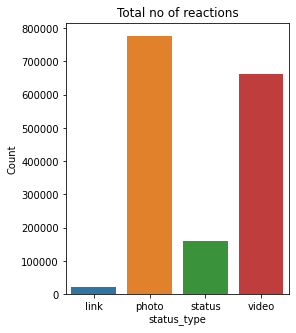

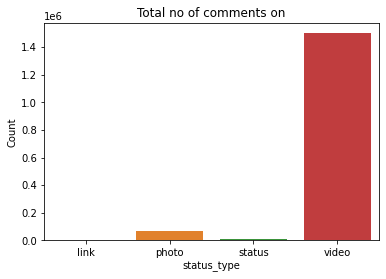

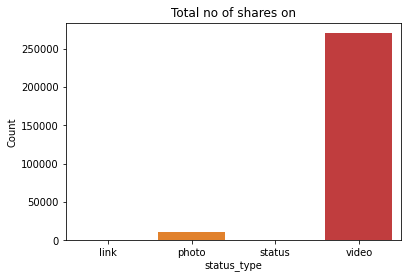

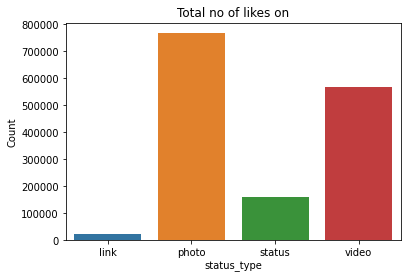

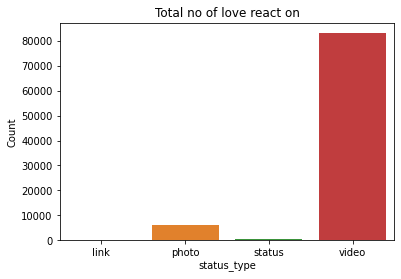

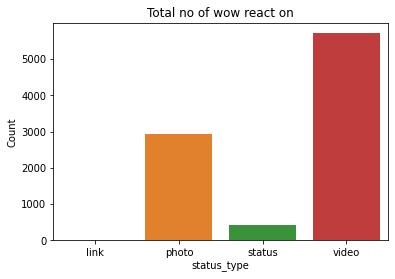

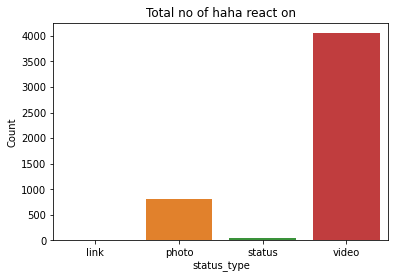

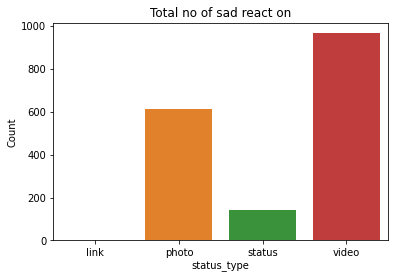

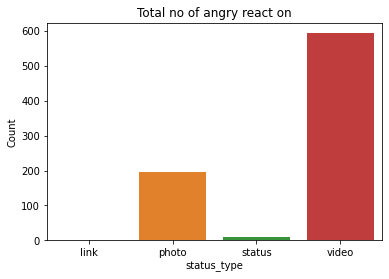

In [18]:
fig = plt.figure(figsize = (4, 5))
sns.barplot(x=cal["status_type"],y=cal["num_reactions"])
plt.ylabel("Count")
plt.title("Total no of reactions")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_comments"])
plt.ylabel("Count")
plt.title("Total no of comments on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_shares"])
plt.ylabel("Count")
plt.title("Total no of shares on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_likes"])
plt.ylabel("Count")
plt.title("Total no of likes on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_loves"])
plt.ylabel("Count")
plt.title("Total no of love react on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_wows"])
plt.ylabel("Count")
plt.title("Total no of wow react on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_hahas"])
plt.ylabel("Count")
plt.title("Total no of haha react on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_sads"])
plt.ylabel("Count")
plt.title("Total no of sad react on")
plt.show()

sns.barplot(x=cal["status_type"],y=cal["num_angrys"])
plt.ylabel("Count")
plt.title("Total no of angry react on")
plt.show()

##Declaring feature vector and target variable

In [19]:
#X=df['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
X=df.loc[:,'num_comments':'num_angrys':1]
y = df['status_type']

In [20]:
y.head() #y contains status type

0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object

###Convert categorical variable into integers

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([3, 1, 3, ..., 1, 1, 1])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   num_comments  7050 non-null   int64
 1   num_shares    7050 non-null   int64
 2   num_likes     7050 non-null   int64
 3   num_loves     7050 non-null   int64
 4   num_wows      7050 non-null   int64
 5   num_hahas     7050 non-null   int64
 6   num_sads      7050 non-null   int64
 7   num_angrys    7050 non-null   int64
dtypes: int64(8)
memory usage: 440.8 KB


In [23]:
X.head()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,512,262,432,92,3,1,1,0
1,0,0,150,0,0,0,0,0
2,236,57,204,21,1,1,0,0
3,0,0,111,0,0,0,0,0
4,0,0,204,9,0,0,0,0


##Feature Scaling 

In [24]:
cols = X.columns

In [25]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler() # used for transforming values in particular range provided 

X = ms.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns=[cols])

In [27]:
X.head()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


##K-Means model with two clusters

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [29]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

###K-Means model parameters study

In [30]:
kmeans.cluster_centers_

array([[0.00875189, 0.00861882, 0.02303852, 0.01393721, 0.00215322,
        0.00324304, 0.00428547, 0.00273741],
       [0.03617079, 0.05207981, 0.34323579, 0.09090242, 0.03732917,
        0.02013148, 0.01126073, 0.01567561]])

In [31]:
kmeans.inertia_

83.3437081056008

###. Check quality of weak classification by the model

In [32]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 265 out of 7050 samples were correctly labeled.
Accuracy score: 0.04


# finding optimal number of clusters 

## Elbow Method

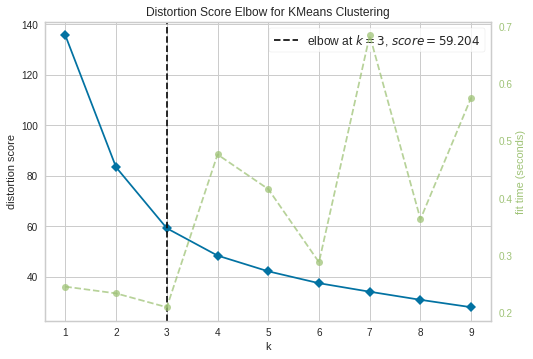

In [33]:
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = df(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

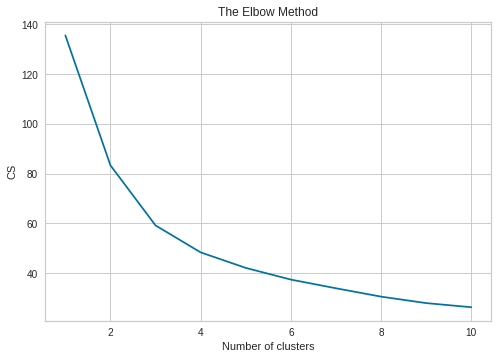

In [34]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### 

*  By the above plot, we can see that there is a kink at k=2.
*  Hence k=2 can be considered a good number of the cluster to cluster this data.
*  But, we have seen that I have achieved a weak classification accuracy of 4% with k=2.   









## Silhouette Analysis

1-Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.

2-Silhouette score takes into consideration the intra-cluster distance 
between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).

3-The silhouette score falls within the range [-1, 1].
The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

In [35]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
#Calculate Silhoutte Score
labels = kmeans.labels_
score=metrics.silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.617


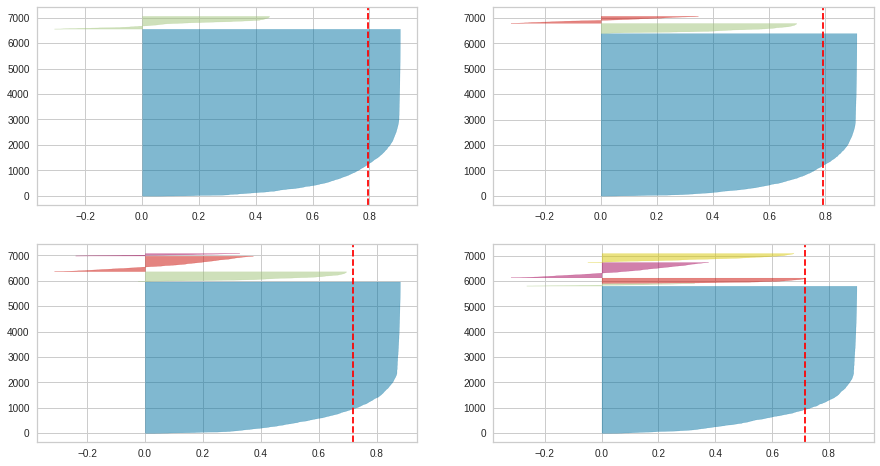

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

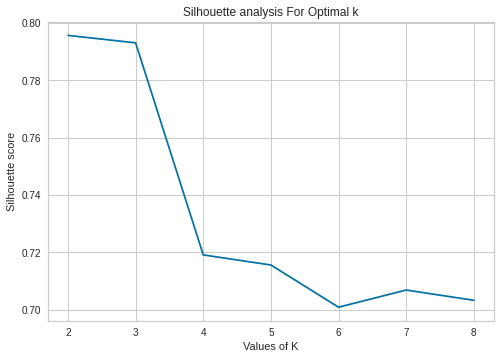

In [37]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(metrics.silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

So, our weak unsupervised classification model achieved a very weak classification accuracy of 1%.

###K-Means model with different clusters

In [38]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 265 out of 7050 samples were correctly labeled.
Accuracy score: 0.04


In [39]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X)

# check how many of the samples were correctly l7abeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4092 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [40]:
score = metrics.accuracy_score(y,kmeans.predict(X))
print(score)

0.5804255319148937


with clusters 5 the result and accuracy again minimized So,We have achieved a relatively high accuracy of 62% with k=4.

In [41]:
kmeans = KMeans(n_clusters=8, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

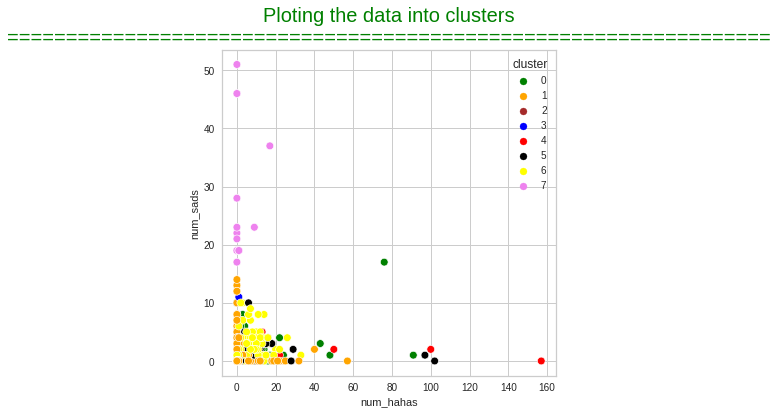

In [60]:

plt.figure(figsize=(6,6))

plt.title("Ploting the data into clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=df, x="num_hahas", y="num_sads", hue="cluster", s=60, palette=['green','orange','brown','blue','red','black','yellow','violet'])
plt.show()

In [52]:
cal=df[df.cluster==0]
cluster_0=cal.groupby("status_type")
cluster_0.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
video,110143,239919,58680,88567,19259,1055,917,163,178,0


In [53]:
cal=df[df.cluster==1]
cluster_1=cal.groupby("status_type")
cluster_1.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
link,2570,160,224,2537,19,12,2,0,0,49
photo,300414,41772,5890,293657,4036,1767,574,261,106,3967
status,29304,5654,309,28710,330,96,36,125,7,268
video,132750,120301,23084,125000,6799,399,377,124,51,1376


In [54]:
cal=df[df.cluster==2]
cluster_2=cal.groupby("status_type")
cluster_2.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
link,10044,140,13,10044,0,0,0,0,0,10
photo,301869,8744,1750,300723,692,406,44,4,0,264
status,57553,2543,132,57434,32,87,0,0,0,54
video,103609,2151,886,103609,0,0,0,0,0,88


In [55]:
cal=df[df.cluster==3]
cluster_3=cal.groupby("status_type")
cluster_3.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
link,10705,59,40,10705,0,0,0,0,0,27
photo,167572,7478,2721,165650,1145,688,67,17,5,504
status,73299,5030,493,72824,208,245,4,16,2,210
video,83807,3289,880,83699,97,6,3,0,2,294


In [56]:
cal=df[df.cluster==4]
cluster_4=cal.groupby("status_type")
cluster_4.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
video,39788,39590,19859,28067,8049,3072,517,37,46,96


In [51]:
cal=df[df.cluster==5]
cluster_5=cal.groupby("status_type")
cluster_5.sum()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
status_type,,,,,,,,,,
photo,4156,202,506,3630,273,32,129,21,71,45
video,154752,589752,134335,109560,42189,862,1572,308,259,3070
